In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# load image
img = cv2.imread('a5j8iom9.jpg') 
img = np.asarray(img)
rsz_img = cv2.resize(img, None, fx=0.25, fy=0.25) # resize since image is huge
gray = cv2.cvtColor(rsz_img, cv2.COLOR_BGR2GRAY) # convert to grayscale

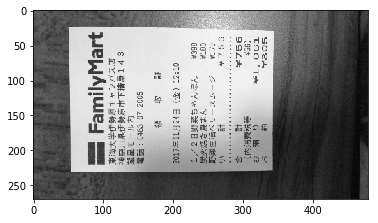

In [17]:
plt.imshow(gray)
plt.gray()
plt.show()

In [18]:
blur = cv2.GaussianBlur(gray,(5,5),0)
retval, thresh_gray = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

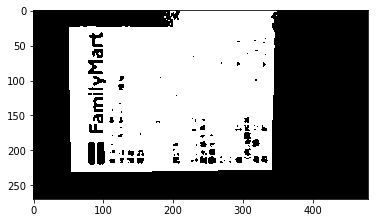

In [19]:
plt.imshow(thresh_gray)
plt.gray()
plt.show()

In [ ]:




# find where the signature is and make a cropped region
points = np.argwhere(thresh_gray==0) # find where the black pixels are
points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image

# get the thresholded crop
retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

# display
cv2.imshow("Cropped and thresholded image", thresh_crop) 
cv2.waitKey(0)